In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
dat_housing = pd.read_csv('housing.csv')
dat_housing.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


In [3]:
np.mean(dat_housing['MEDV'])

22.532806324110698

In [4]:
dat_housing = pd.concat([dat_housing, pd.get_dummies(dat_housing['RIVER'], prefix='river', drop_first=True)], axis=1)
dat_housing.drop(['RIVER'], inplace=True, axis=1)
dat_housing.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,river_Yes
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3,1
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0,1
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6,1
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0,1


In [5]:
np.mean(dat_housing['river_Yes'])

0.0691699604743083

In [6]:
dat_housing.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,river_Yes
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.055892
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.042697
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.062938
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.091203
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.091251
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.086518
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.099176
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.007368
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.035587
PRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787,-0.121515


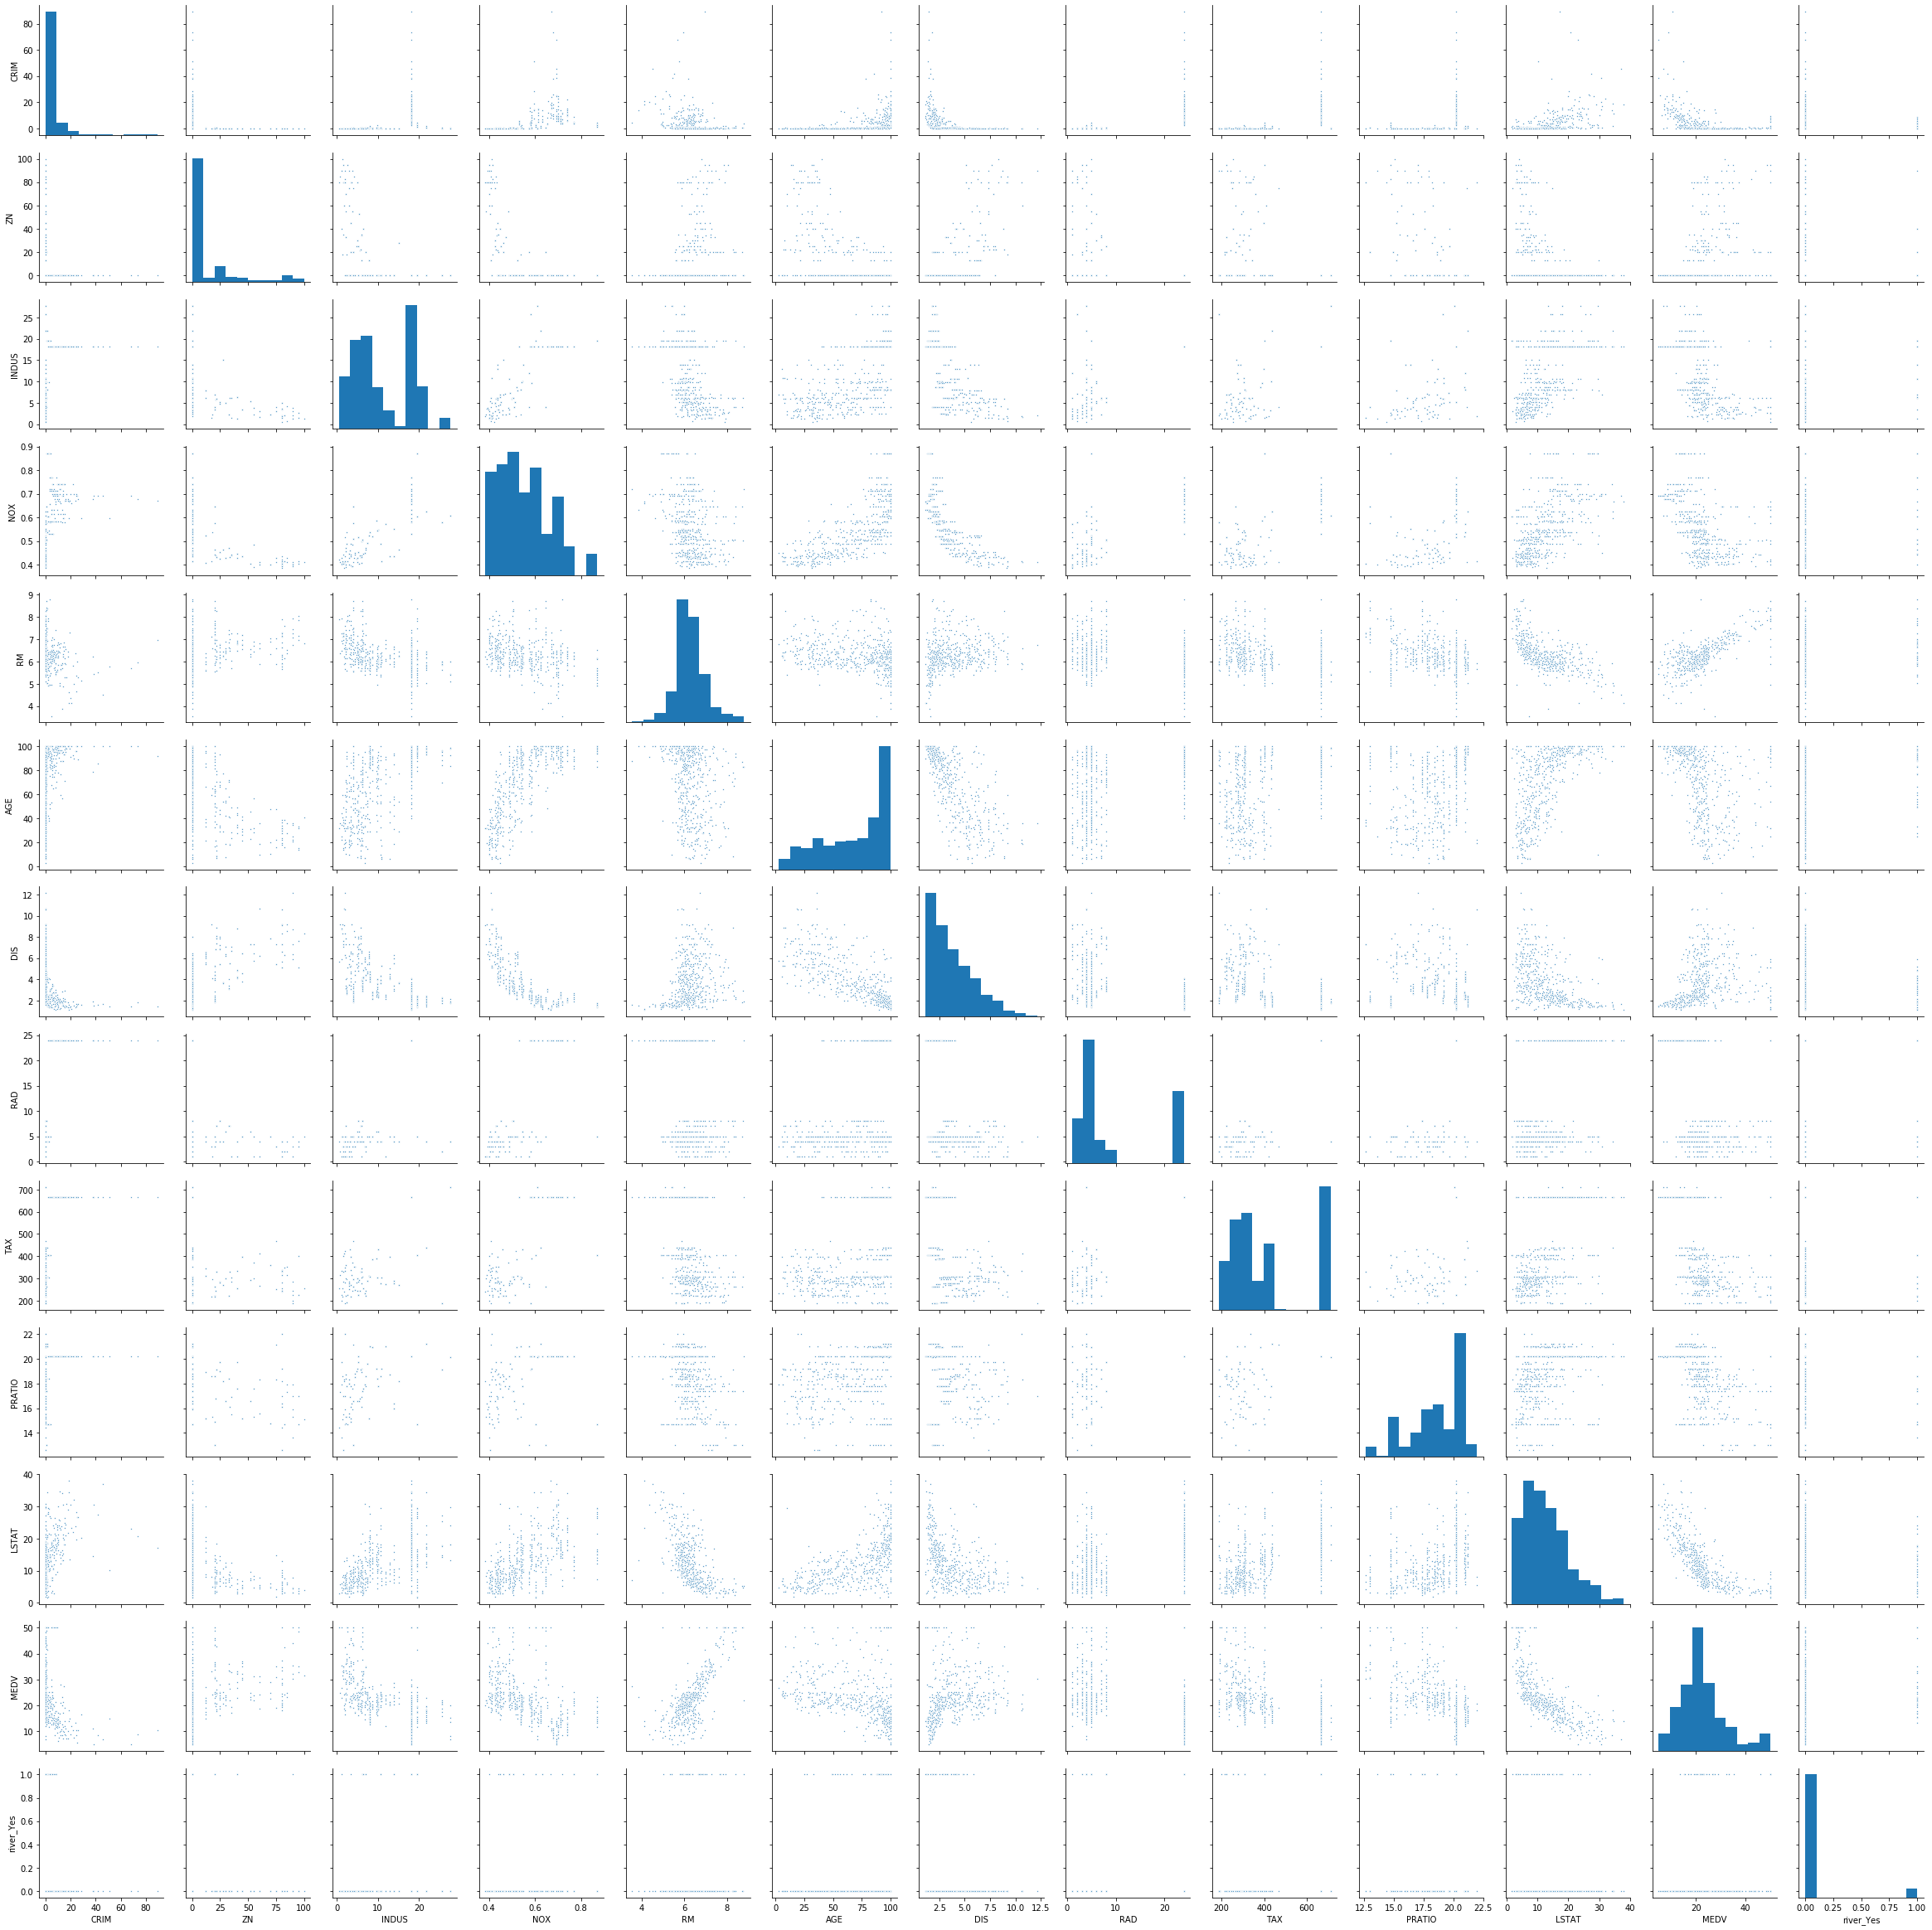

In [7]:
sns.pairplot(dat_housing, plot_kws={"s": 3});

In [8]:
X = dat_housing.drop(['MEDV'], axis=1)
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,river_Yes
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,1
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,1
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,1
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,1
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,1


In [9]:
y=dat_housing['MEDV']
y.head()

0    13.4
1    15.3
2    17.0
3    15.6
4    27.0
Name: MEDV, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [11]:
# 1. Import the Estimator class you will use
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the class
ml_reg = LinearRegression()
# 3. Use the fit method of the instance
ml_reg.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [12]:
pd.Series(ml_reg.coef_, index=X.columns).sort_values(ascending=False).round(3)

RM            3.614
river_Yes     3.252
RAD           0.246
ZN            0.048
AGE           0.007
INDUS        -0.009
TAX          -0.011
CRIM         -0.133
LSTAT        -0.566
PRATIO       -0.936
DIS          -1.425
NOX         -15.199
dtype: float64

In [13]:
ml_reg.intercept_.round(3)

39.438

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_ml_reg))

Mean squared error: 21.03


In [15]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_pred_ml_reg))

Variance score: 0.74


In [16]:
# Use the predict method to get the predictions for the test data
y_pred_ml_reg_test = ml_reg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_ml_reg_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_ml_reg_test))

Mean squared error: 27.14
Variance score: 0.71
